In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [221]:
dataPrev = pd.read_csv('Prosperity-2-Round-3-Manual-Distributions-Sheet1.csv')
fillValue = (100 - dataPrev['Percent of Expeditions'].sum())/5
# dataPrev.dropna(inplace=True)
dataPrev['Profit Pre'] = dataPrev['Multiplier'] / dataPrev['Hunters']
dataPrev

,Multiplier,Percent of Expeditions,Hunters,Profit Pre
0,100,4.930096,8,12.500000
1,90,3.433897,7,12.857143
2,89,10.760000,5,17.800000
3,87,9.835664,5,17.400000
4,85,6.548933,5,17.000000
5,83,5.445180,5,16.600000
6,82,6.200000,5,16.400000
7,80,4.145205,5,16.000000
8,79,5.445180,5,15.800000
9,77,4.562178,5,15.400000


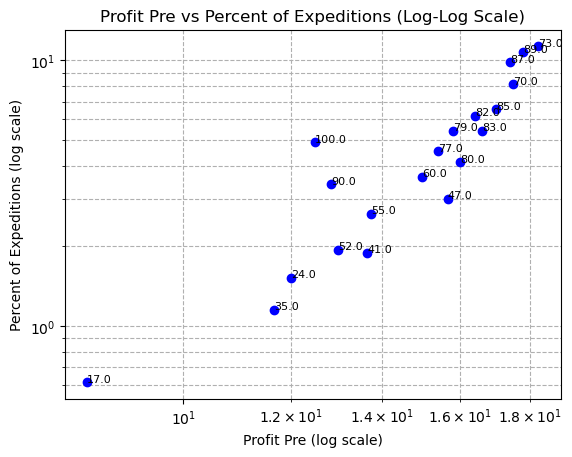

In [142]:
plt.loglog(dataPrev['Profit Pre'], dataPrev['Percent of Expeditions'], 'o', color='blue')
plt.title('Profit Pre vs Percent of Expeditions (Log-Log Scale)')
plt.xlabel('Profit Pre (log scale)')
plt.ylabel('Percent of Expeditions (log scale)')
plt.grid(True, which="both", ls="--")

# Annotate points with Multiplier
for i, row in dataPrev.iterrows():
    plt.annotate(row['Multiplier'], (row['Profit Pre'], row['Percent of Expeditions']), fontsize=8)


In [177]:

# Filter out points with Multiplier values 12, 15, 17, 27, 30, 21
# filtered_data = dataPrev[~dataPrev['Multiplier'].isin([12, 15, 17, 27, 30, 21])]
filtered_data = dataPrev[~dataPrev['Multiplier'].isin([12, 15, 17, 27, 30, 21, 100])] # 100 is a huge outlier, optionally filter out


In [181]:
normalizationConstant = 95 / filtered_data['Percent of Expeditions'].sum()
filtered_data['Percent of Expeditions'] = filtered_data['Percent of Expeditions'] * normalizationConstant

C:\Users\94liu\AppData\Local\Temp\ipykernel_18940\4166493600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Percent of Expeditions'] = filtered_data['Percent of Expeditions'] * normalizationConstant


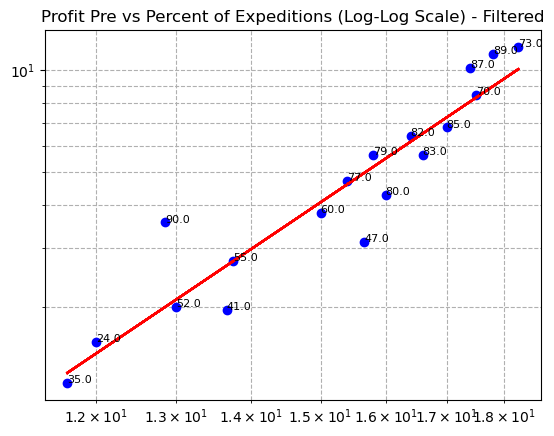

In [204]:

# Re-plot the filtered data
plt.figure()
plt.loglog(filtered_data['Profit Pre'], filtered_data['Percent of Expeditions'], 'o', color='blue')
plt.title('Profit Pre vs Percent of Expeditions (Log-Log Scale) - Filtered')
# plt.xlabel('Profit Pre (log scale)')
# plt.ylabel('Percent of Expeditions (log scale)')
plt.grid(True, which="both", ls="--")

# Annotate points with Multiplier
for i, row in filtered_data.iterrows():
    plt.annotate(row['Multiplier'], (row['Profit Pre'], row['Percent of Expeditions']), fontsize=8)
    # Fit a line to the filtered data

    # Perform linear regression on log-transformed data
    log_x = np.log(filtered_data['Profit Pre'])
    log_y = np.log(filtered_data['Percent of Expeditions'])
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, log_y)

    # Plot the fitted line
    x_vals = np.linspace(log_x.min(), log_x.max(), 100)
    y_vals = slope * x_vals + intercept
    plt.plot(np.exp(x_vals), np.exp(y_vals), color='red', label=f'Fit: y = {np.exp(intercept):.2f} * x^{slope:.2f}')
    # plt.legend()
plt.show()

In [185]:
print('slope: {}, intercept: {}, p_value: {}, r_value: {}, std_err: {}'.format(slope, intercept, p_value, r_value, std_err))

slope: 4.6112281490591185, intercept: -11.081073795595366, p_value: 5.09868149628625e-09, r_value: 0.9423745548012542, std_err: 0.4092669780042777


In [207]:
filtered_data = filtered_data.assign(y_pred = np.exp(intercept) * filtered_data['Profit Pre']**slope)
normalizationConstant = 95 / filtered_data['y_pred'].sum()
filtered_data['y_pred'] = filtered_data['y_pred'] * normalizationConstant

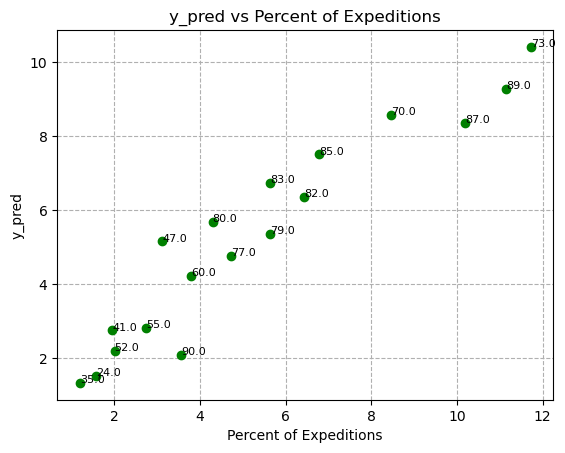

In [208]:

plt.figure()
plt.plot(filtered_data['Percent of Expeditions'], filtered_data['y_pred'], 'o', color='green')
plt.title('y_pred vs Percent of Expeditions')
plt.xlabel('Percent of Expeditions')
plt.ylabel('y_pred')
plt.grid(True, which="both", ls="--")


# Annotate points with Multiplier
for i, row in filtered_data.iterrows():
    plt.annotate(row['Multiplier'], (row['Percent of Expeditions'], row['y_pred']), fontsize=8)

plt.show()

In [187]:
dataPrev = dataPrev.assign(y_pred = np.exp(intercept) * dataPrev['Profit Pre']**slope)
normalizationConstant = dataPrev['y_pred'].sum() / 100
dataPrev = dataPrev.assign(y_pred = dataPrev['y_pred'] / normalizationConstant)
dataPrev.columns

Index(['Multiplier', 'Percent of Expeditions', 'Hunters', 'Profit Pre',
       'y_pred'],
      dtype='object')

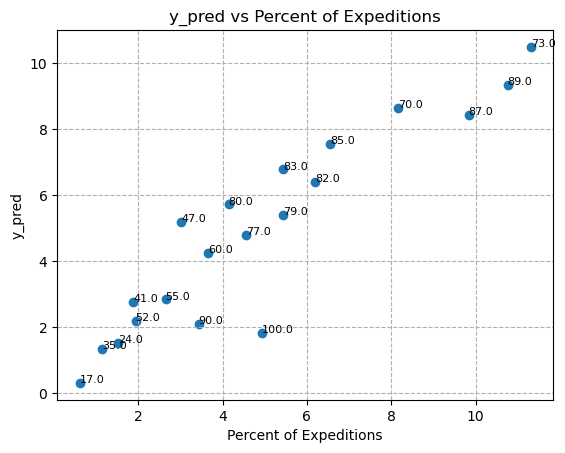

In [195]:
plt.figure()
plt.scatter(dataPrev['Percent of Expeditions'], dataPrev['y_pred'])
plt.title('y_pred vs Percent of Expeditions')
plt.xlabel('Percent of Expeditions')
plt.ylabel('y_pred')
plt.grid(True, which="both", ls="--")

# Annotate points with Multiplier
for i, row in dataPrev.iterrows():
    plt.annotate(row['Multiplier'], (row['Percent of Expeditions'], row['y_pred']), fontsize=8)
plt.show()

In [189]:
def calculate_profit(multiplier, hunters, percent_expeditions):
    return multiplier / (hunters + percent_expeditions)

In [210]:
dataPrev = dataPrev.assign(Profit = calculate_profit(
    dataPrev['Multiplier'],
    dataPrev['Hunters'], 
    dataPrev['Percent of Expeditions']))
dataPrev = dataPrev.assign(Profit_pred = calculate_profit(
    dataPrev['Multiplier'],
    dataPrev['Hunters'], 
    dataPrev['y_pred']))


In [211]:
filtered_data = filtered_data.assign(Profit = calculate_profit(
    filtered_data['Multiplier'],
    filtered_data['Hunters'], 
    filtered_data['Percent of Expeditions']))
filtered_data = filtered_data.assign(Profit_pred = calculate_profit(
    filtered_data['Multiplier'],
    filtered_data['Hunters'], 
    filtered_data['y_pred']))


In [218]:
filtered_data['Error'] = (filtered_data['Profit'] - filtered_data['Profit_pred']) / filtered_data['Profit'] * 100
filtered_data['Error'] = filtered_data['Error'].abs()

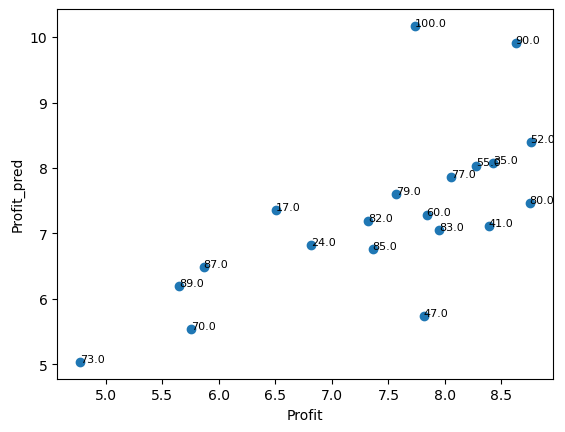

In [192]:

plt.figure()
plt.scatter(dataPrev['Profit'], dataPrev['Profit_pred'])

# Annotate points with Multiplier
for i, row in dataPrev.iterrows():
    plt.annotate(row['Multiplier'], (row['Profit'], row['Profit_pred']), fontsize=8)
plt.xlabel('Profit')
plt.ylabel('Profit_pred')

plt.show()

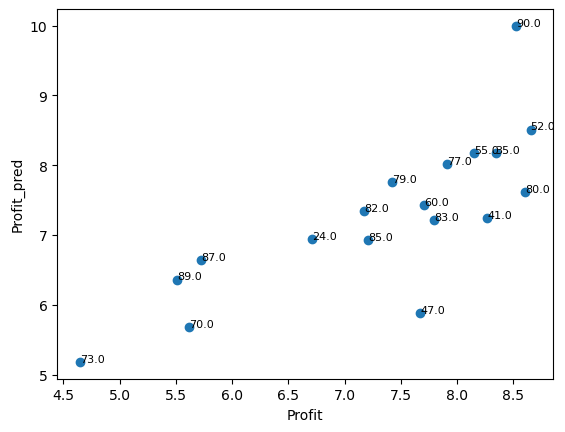

In [193]:

plt.figure()
plt.scatter(filtered_data['Profit'], filtered_data['Profit_pred'])

# Annotate points with Multiplier
for i, row in filtered_data.iterrows():
    plt.annotate(row['Multiplier'], (row['Profit'], row['Profit_pred']), fontsize=8)
plt.xlabel('Profit')
plt.ylabel('Profit_pred')

plt.show()

# Data Input

In [171]:
multipliers = [90, 89, 80, 73, 50, 37, 31, 20, 17, 10]
inhabitants = [10, 8, 6, 4, 4, 3, 2, 2, 1, 1]

# Create a DataFrame with the multipliers and inhabitants
df = pd.DataFrame({'Multiplier': multipliers, 'Inhabitants': inhabitants})

In [234]:
# compute pick rate threshold to remain profitable at second pick
df['threshold'] = df['Multiplier'] / 5 - df['Inhabitants']
df['Profit Pre'] = df['Multiplier'] / df['Inhabitants']
df.sort_values(by='Profit Pre', ascending=False)

,Multiplier,Inhabitants,threshold,Profit Pre
3,73,4,10.6,18.250000
8,17,1,2.4,17.000000
6,31,2,4.2,15.500000
2,80,6,10.0,13.333333
4,50,4,6.0,12.500000
5,37,3,4.4,12.333333
1,89,8,9.8,11.125000
7,20,2,2.0,10.000000
9,10,1,1.0,10.000000
0,90,10,8.0,9.000000


In [235]:
df_filtered = (df
 .query('threshold > 2')
 .query('Multiplier < 90'))

In [236]:
df_filtered['predictedPickRate'] = df_filtered['Profit Pre'] ** slope
normalizationConstant = 90 / df_filtered['predictedPickRate'].sum()
df_filtered['predictedPickRate'] = df_filtered['predictedPickRate'] * normalizationConstant

In [238]:
df_filtered['predictedProfit'] = df_filtered['Multiplier'] / (df_filtered['Inhabitants'] + df_filtered['predictedPickRate'])

In [239]:
df_filtered

,Multiplier,Inhabitants,threshold,Profit Pre,predictedPickRate,predictedProfit
1,89,8,9.8,11.125000,3.202171,7.944888
2,80,6,10.0,13.333333,7.380157,5.979003
3,73,4,10.6,18.250000,31.382481,2.063168
4,50,4,6.0,12.500000,5.480482,5.273993
5,37,3,4.4,12.333333,5.151544,4.539017
6,31,2,4.2,15.500000,14.777721,1.847688
8,17,1,2.4,17.000000,22.625445,0.719563


In [244]:
df_filtered.iloc[0].predictedProfit * 10000

79448.88499411414

In [241]:
df_filtered.head(2)['predictedProfit'].sum() * 10000 - 50000

89238.91644519824